<a href="https://colab.research.google.com/github/CelaPablo/SOA-EA2/blob/master/HPC/Cela_Pablo_ejercicio_2_CPU_reentrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En el siguiente ejercicio, se toma una imagen parametrizada y se la convierte a una con el efecto SEPIA [1, 2].

Para ello, se toman cada pixel de la imagen original y se le aplica siguiente calculo:

<center>NR = 0.393R + 0.769G + 0.189B</center>
<center>NG = 0.349R + 0.686G + 0.168B</center>
<center>NB = 0.272R + 0.534G + 0.131B</center>

Donde R, G y B corresponden a los valores del pixel de la imagen original.
Los nuevos colores calculados, se los compara con 255, y en caso de ser superiores a este, se guarda en dicho color el numero 255 (esto se repite para los 3 colores que conforman el pixel R-G-B).

Con este ejercicio, se pretende entender el funcionamiento basico del Lenguaje Python [3], Google Colab [4,5] y tratamiento de imagenes a bajo nivel.


---
# Armado del ambiente
Se toman la dirección web de una imagen y se la deja disponible en el contexto del cuaderno Colab.


In [ ]:
#@title ## Parámetros de ejecución

#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://ichef.bbci.co.uk/news/640/cpsprodpb/A694/production/_115644624_gettyimages-984948454.jpg" #@param {type:"string"}


!wget {url_imagen} -O imagen.jpg

---
# Desarrollo - Ejecución CPU.

Efecto Sepia.


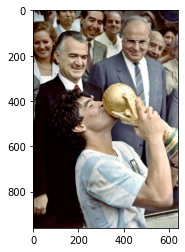

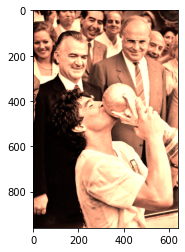

Tiempo en procesar las imagenes: 14877.514 [ms]
Tiempo de representacion de las imagenes: 396.38 [ms]
Tiempo Total: 15274.286 [ms]


In [28]:
# ------------------------------------------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos --------------
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# ------------------------------------------------------------------------------

try:
  %matplotlib inline
  from datetime import datetime
  import  matplotlib.pyplot as plt
  import numpy
  from PIL import Image 

  tiempo_total = datetime.now()

  # Cargo la imagen ------------------------------------------------------------
  imagepath = 'imagen.jpg'
  image = Image.open(imagepath)

  # Proporciones de la imagen. -------------------------------------------------
  img_alto, img_ancho = image.size 

  tiempo_img = datetime.now()

  # Cargo la imagen en un array. -----------------------------------------------
  img_cpu = numpy.asarray(image)
  result_cpu = numpy.empty_like(img_cpu)

  for x in range(0, img_ancho):
    for y in range(0, img_alto):      
      R, G, B = img_cpu[x][y]
      tr = (0.939 * R) + (0.769 * G) + (0.189 * B)
      tg = (0.349 * R) + (0.686 * G) + (0.168 * B)
      tb = (0.272 * R) + (0.534 * G) + (0.131 * B)

      nr = 255 if tr > 255 else tr
      ng = 255 if tg > 255 else tg
      nb = 255 if tb > 255 else tb

      result_cpu[x][y] = [nr, ng, nb]

  # Tiempos de respuesta de CPU. -----------------------------------------------
  tiempo_img = datetime.now() - tiempo_img
  tiempo_representacion = datetime.now()

  # Muestro la imagen original. ------------------------------------------------
  plt.figure()
  plt.imshow(img_cpu)
  plt.show()
  
  # Muestro la imagen resultante. ----------------------------------------------
  plt.imshow(result_cpu)
  plt.show()

  tiempo_representacion = datetime.now() - tiempo_representacion 
  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempo en procesar las imagenes:", tiempo_en_ms(tiempo_img), "[ms]")
  print( "Tiempo de representacion de las imagenes:", tiempo_en_ms(tiempo_representacion), "[ms]")
  print( "Tiempo Total:", tiempo_en_ms(tiempo_total), "[ms]")

except ValueError as valerr:
  print(valerr)
except FileNotFoundError:
  print("No se pudo abrir la imagen: ", imagepath)
except ModuleNotFoundError:
  print("Primero deben instalarse las dependencias - Armado del ambiente e instalaciónn de CUDA.")
except: 
  print("Houston we have a problem!")


---
# Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de la dirección URL de la imagen a procesar.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  for...for..           | Por cada pixel, se toman los valores RGB y se aplica la formula del efecto sepia descripto en la introducción.
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  plt.imshow            | Muestra la imagen de resultado.
CPU      |  print()               | Informa los tiempos de cada funcionalidad.




---
# Conclusión

En este ejercicio se afianzo el funcionamiento del trabajo en paralelo. 

En cuanto a los resultado, el trabajo en paralelo es muchisimo mas rapido y su demora solo se ve afectada por los trabajos en CPU como los de mostrar las imagenes y los tiempos de ejecución.

En promedio, con la ejecución en serie obtuve un resultado de 12374.286 [ms] (tamando 10 ejecuciones). Por otra parte, con la ejecución en paralelo, la nueva imagen se resolvió en un promedio de 345.094 [ms].

Si bien laejecución en paralelo es beneficiosa respecto del tiempo, la ejecución en serie nos provee una calidad final mucho mayor; esto se debe a los calculos aplicados dentro GPU y a las converciones entre los tipos de datos.

---
# Bibliografía

[1] Sepia Color: [Wikipedia](https://es.wikipedia.org/wiki/Sepia_(color)

[2] Efecto sepia: [Github](https://abhijitnathwani.github.io/blog/2018/01/08/colortosepia-Image-using-C)

[3] MARKDOWN SYNTAX Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[4] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[5] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

